[np.float64(0.1), np.float64(0.5), np.float64(1.0)]


/tmp/ipykernel_23023/3213711845.py:32: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("Accent", len(params))


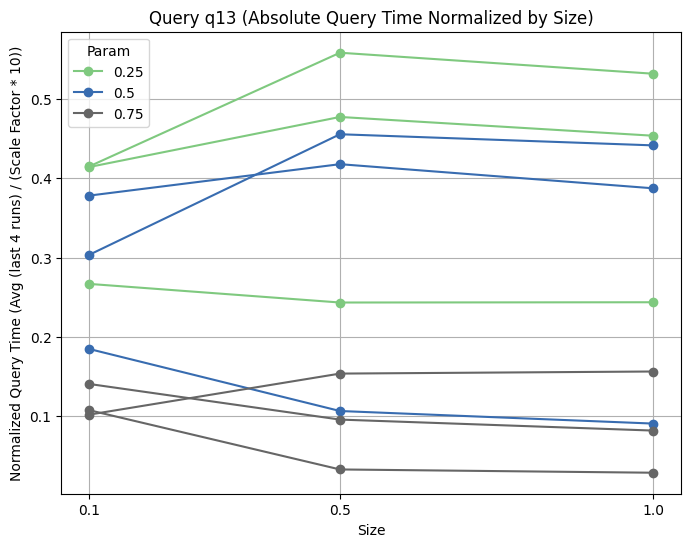

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# RESULTS_PATH = "../results/verify-datasize-irrelevance/tpch/2025-03-20-11H/"
RESULTS_PATH = "../results/verify-datasize-irrelevance/tpch/2025-03-24-17H/"


# RESULTS_PATH = "../results/verify-datasize-irrelevance/tpch/2025-04-25-13H/"


# Read the CSV file
df = pd.read_csv(RESULTS_PATH + 'meta_data.csv')
df['Scale_factor'] = pd.to_numeric(df['Scale_factor'])

normalization_constant = 10

# Create a new column with the normalized query time.
# For each row, the total query time is divided by (Scale_factor * 10)
df['normalized_time_by_size'] = df.apply(lambda row: row['Avg (last 4 runs)'] / (row['Scale_factor'] * normalization_constant), axis=1)

# Get unique queries to loop over
queries = df['Query'].unique()

for query in queries:
    # Filter data for the current query
    df_query = df[df['Query'] == query]
    
    plt.figure(figsize=(8, 6))
    
    # Get unique parameters and assign each a color from a colormap
    params = df_query['Param'].unique()
    cmap = plt.cm.get_cmap("Accent", len(params))
    
    for i, param in enumerate(params):
        # Filter data for the current parameter
        df_param = df_query[df_query['Param'] == param]
        replicates = df_param['Replicate'].unique()
        
        for j, rep in enumerate(replicates):
            # Filter data for the current replicate and sort by Scale_factor
            df_rep = df_param[df_param['Replicate'] == rep].copy().sort_values(by='Scale_factor')
            
            # Label only the first replicate for the legend
            if j == 0:
                plt.plot(df_rep['Scale_factor'], df_rep['normalized_time_by_size'], marker='o',
                         label=str(param), color=cmap(i))
            else:
                plt.plot(df_rep['Scale_factor'], df_rep['normalized_time_by_size'], marker='o',
                         color=cmap(i))
    
    scale_factors = sorted(df_query['Scale_factor'].unique())
    plt.xticks(scale_factors)

    print(sorted(df_query['Scale_factor'].unique()))

    plt.title(f'Query {query} (Absolute Query Time Normalized by Size)')
    plt.xlabel('Size')
    plt.ylabel(f'Normalized Query Time (Avg (last 4 runs) / (Scale Factor * {normalization_constant}))')
    plt.legend(title='Param')
    plt.grid(True)
    plt.show()


/tmp/ipykernel_23023/1428613504.py:28: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed in 3.11. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap()`` or ``pyplot.get_cmap()`` instead.
  cmap = plt.cm.get_cmap("Accent", len(params)*3)


[np.float64(0.1), np.float64(0.5), np.float64(1.0)]


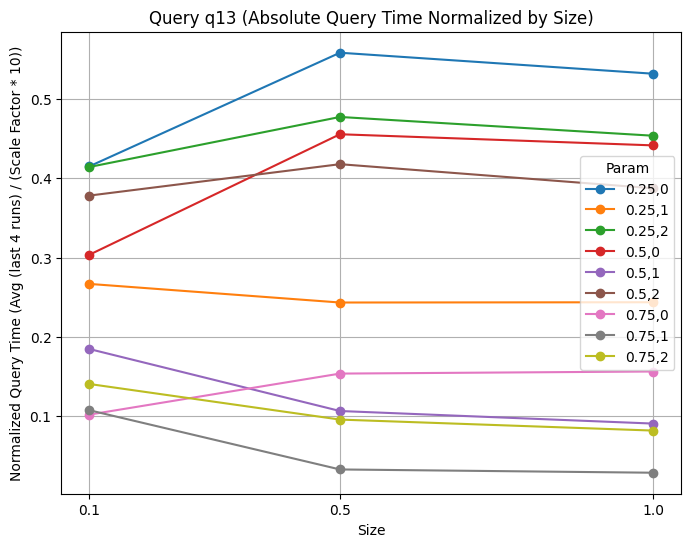

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

#RESULTS_PATH = "../results/verify-datasize-irrelevance/tpch/2025-03-20-11H/"
# RESULTS_PATH = "../results/verify-datasize-irrelevance/tpch/2025-03-24-17H/"

# Read the CSV file
df = pd.read_csv(RESULTS_PATH + 'meta_data.csv')
df['Scale_factor'] = pd.to_numeric(df['Scale_factor'])

normalization_constant = 10

# Create a new column with the normalized query time.
# For each row, the total query time is divided by (Scale_factor * 10)
df['normalized_time_by_size'] = df.apply(lambda row: row['Avg (last 4 runs)'] / (row['Scale_factor'] * normalization_constant), axis=1)

# Get unique queries to loop over
queries = df['Query'].unique()

for query in queries:
    # Filter data for the current query
    df_query = df[df['Query'] == query]
    
    plt.figure(figsize=(8, 6))
    
    # Get unique parameters and assign each a color from a colormap
    params = df_query['Param'].unique()
    cmap = plt.cm.get_cmap("Accent", len(params)*3)
    
    for i, param in enumerate(params):
        # Filter data for the current parameter
        df_param = df_query[df_query['Param'] == param]
        replicates = df_param['Replicate'].unique()
        
        for j, rep in enumerate(replicates):
            # Filter data for the current replicate and sort by Scale_factor
            df_rep = df_param[df_param['Replicate'] == rep].copy().sort_values(by='Scale_factor')
            
            # Label only the first replicate for the legend

            plt.plot(df_rep['Scale_factor'], df_rep['normalized_time_by_size'], marker='o',
                        label=str(param) + "," + str(rep))

    
    scale_factors = sorted(df_query['Scale_factor'].unique())
    plt.xticks(scale_factors)

    print(sorted(df_query['Scale_factor'].unique()))

    plt.title(f'Query {query} (Absolute Query Time Normalized by Size)')
    plt.xlabel('Size')
    plt.ylabel(f'Normalized Query Time (Avg (last 4 runs) / (Scale Factor * {normalization_constant}))')
    plt.legend(title='Param')
    plt.grid(True)
    plt.show()
